In [1]:

import numpy as np
import pandas as pd
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import seaborn as sns
from sklearn.impute import KNNImputer
# Load the data
data = pd.read_csv("F:\\FALL SEMESTER 2024\\Digital Tools for Finance\\Project\\Processes Data\\Gross pay.csv",header=0,
        usecols=["Year", "Job Role", "Employment Category","Work Type","Gross Pay Men","Gross Pay Women","Gender Pay Gap","Pay Gap Percentage"])
df = pd.DataFrame(data)
df.columns = df.columns.str.strip()
print(df.head()) 
# printing dataframe
new_df = df.dropna()

print(new_df.to_string())


   Year                          Job Role Employment Category  Work Type  \
0  2023       Executives, senior managers       Self Employed  Full Time   
1  2023   Academic/scientific professions       Self Employed  Full Time   
2  2023          Intermediate professions       Self Employed  Full Time   
3  2023              Administrative staff       Self Employed  Full Time   
4  2023           Service and sales staff       Self Employed  Full Time   

   Gross Pay Men  Gross Pay Women  Gender Pay Gap  Pay Gap Percentage  
0       100000.0          76200.0         23800.0           23.800000  
1       120000.0          90000.0         30000.0           25.000000  
2        89300.0          69100.0         20200.0           22.620381  
3        70900.0          67500.0          3400.0            4.795487  
4        60000.0          54000.0          6000.0           10.000000  
     Year                          Job Role Employment Category  Work Type  Gross Pay Men  Gross Pay Women  Gen

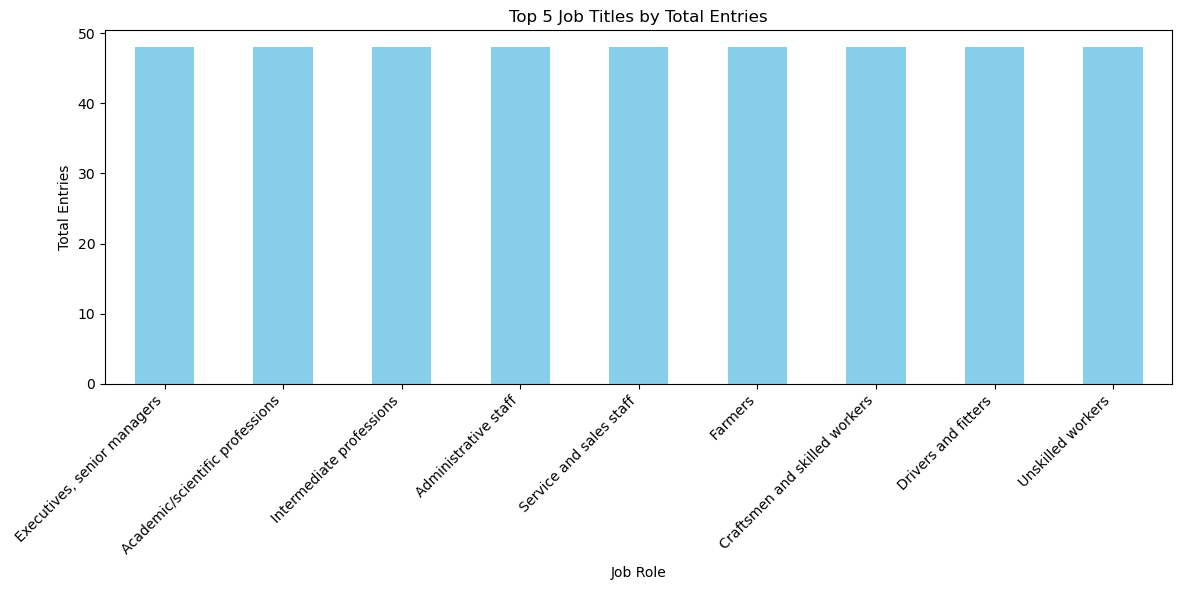

In [2]:
title_counts = df['Job Role'].value_counts().sort_values(ascending=False)

# Creating the bar chart
plt.figure(figsize=(12, 6))
title_counts[:15].plot(kind='bar', color='skyblue')
plt.title('Top 5 Job Titles by Total Entries')
plt.xlabel('Job Role')
plt.ylabel('Total Entries')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensures the labels fit within the figure
plt.show()

In [3]:
# Compute descriptive statistics
desc_stats = df.describe()

# Display the descriptive statistics
print("Descriptive Statistics for Numerical Columns:")
print(desc_stats)

# Compute additional statistics
print("\nAdditional Statistics:")
print(f"Mean Pay Gap Percentage: {df['Pay Gap Percentage'].mean():.2f}%")
print(f"Median Pay Gap Percentage: {df['Pay Gap Percentage'].median():.2f}%")
print(f"Standard Deviation of Pay Gap Percentage: {df['Pay Gap Percentage'].std():.2f}%")
print(f"Max Pay Gap: {df['Gender Pay Gap'].max():,.2f}")
print(f"Min Pay Gap: {df['Gender Pay Gap'].min():,.2f}")

# Grouped Descriptive Statistics
print("\nGrouped Statistics:")
# Average Pay Gap Percentage by Job Role
avg_gap_by_role = df.groupby("Job Role")["Pay Gap Percentage"].mean().sort_values(ascending=False)
print("Average Pay Gap Percentage by Job Role:")
print(avg_gap_by_role)

# Sum of Pay Gaps by Work Type
sum_gap_by_work = df.groupby("Work Type")["Gender Pay Gap"].sum().sort_values(ascending=False)
print("\nSum of Pay Gaps by Work Type:")
print(sum_gap_by_work)

# Count of Records by Employment Category
record_count_by_category = df["Employment Category"].value_counts()
print("\nRecord Count by Employment Category:")
print(record_count_by_category)

Descriptive Statistics for Numerical Columns:
              Year  Gross Pay Men  Gross Pay Women  Gender Pay Gap  \
count   432.000000     431.000000       421.000000      430.000000   
mean   2017.500000   61225.986079     47136.342043    15218.604651   
std       3.456055   27670.401824     22186.109660    12584.597753   
min    2012.000000   13300.000000      6400.000000   -22300.000000   
25%    2014.750000   37500.000000     28200.000000     7500.000000   
50%    2017.500000   61300.000000     46600.000000    13800.000000   
75%    2020.250000   74150.000000     60000.000000    21000.000000   
max    2023.000000  136000.000000    118900.000000    70800.000000   

       Pay Gap Percentage  
count          418.000000  
mean            21.548365  
std             19.516918  
min           -163.970588  
25%             14.453877  
50%             21.150574  
75%             31.665718  
max             82.758621  

Additional Statistics:
Mean Pay Gap Percentage: 21.55%
Median Pay Gap 

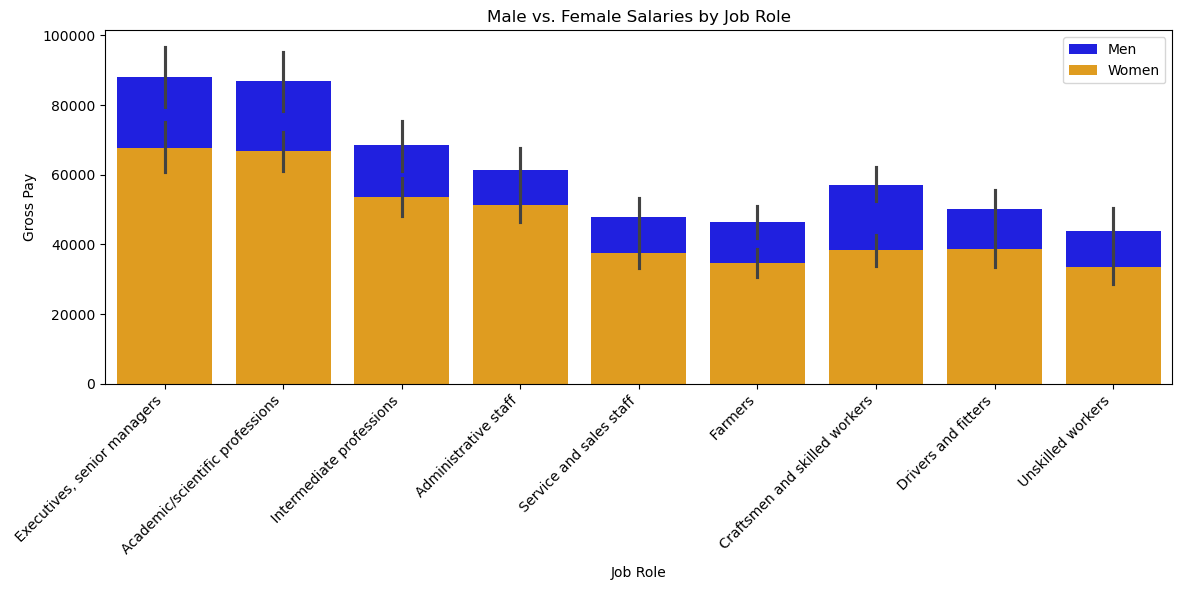

In [4]:
# Bar Chart: Comparing male vs. female salaries by job role
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Job Role", y="Gross Pay Men", color="blue", label="Men")
sns.barplot(data=df, x="Job Role", y="Gross Pay Women", color="orange", label="Women")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Gross Pay")
plt.title("Male vs. Female Salaries by Job Role")
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
print("Original Data with Missing Values:")
print(df.isnull().sum())

Original Data with Missing Values:
Year                    0
Job Role                0
Employment Category     0
Work Type               0
Gross Pay Men           1
Gross Pay Women        11
Gender Pay Gap          2
Pay Gap Percentage     14
dtype: int64


In [6]:
# Define columns for KNN imputation (numerical columns only)
numerical_columns = ['Gross Pay Men', 'Gross Pay Women', 'Gender Pay Gap', 'Pay Gap Percentage']

# Ensure the dataset has only numeric columns for KNN
knn_data = df[numerical_columns]

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=3)  # Use 3 nearest neighbors; adjust as needed

# Apply the imputer to the data
imputed_data = imputer.fit_transform(knn_data)

# Replace the original columns with the imputed values
df[numerical_columns] = imputed_data

# Display data after imputation
print("\nData After KNN Imputation:")
print(df)

# Check if there are still missing values
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Data After KNN Imputation:
     Year                          Job Role Employment Category  Work Type  \
0    2023       Executives, senior managers       Self Employed  Full Time   
1    2023   Academic/scientific professions       Self Employed  Full Time   
2    2023          Intermediate professions       Self Employed  Full Time   
3    2023              Administrative staff       Self Employed  Full Time   
4    2023           Service and sales staff       Self Employed  Full Time   
..    ...                               ...                 ...        ...   
427  2012           Service and sales staff           Employees  Part Time   
428  2012                           Farmers           Employees  Part Time   
429  2012     Craftsmen and skilled workers           Employees  Part Time   
430  2012               Drivers and fitters           Employees  Part Time   
431  2012                 Unskilled workers           Employees  Part Time   

     Gross Pay Men  Gross Pay Women

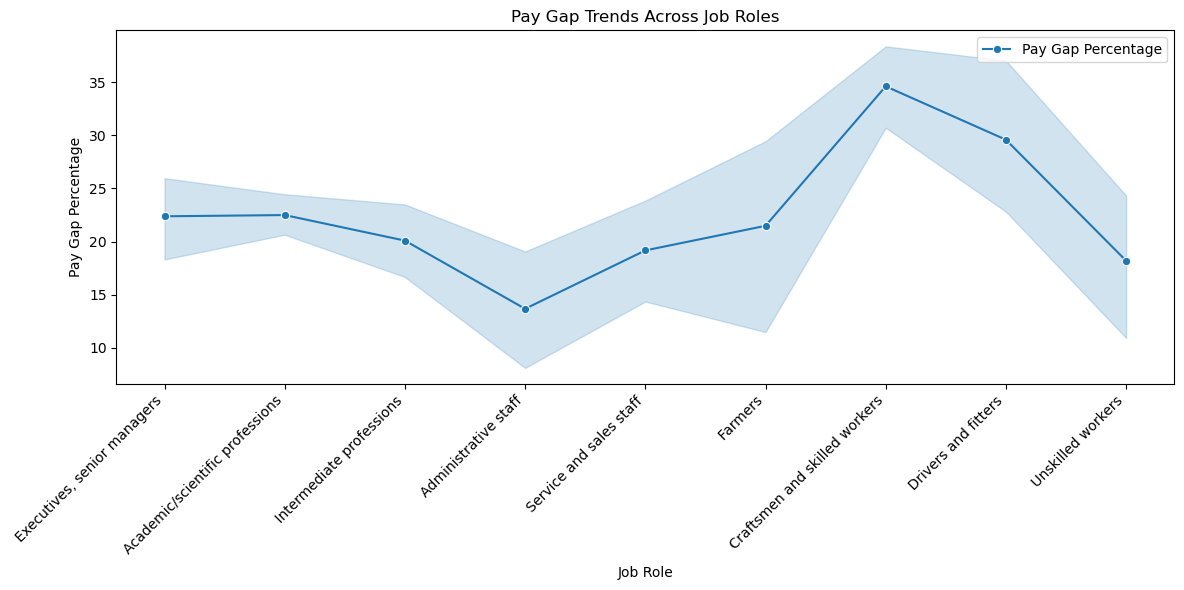

In [7]:
# Line Chart: Tracking pay gap trends over job roles
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Job Role", y="Pay Gap Percentage", marker="o", label="Pay Gap Percentage")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Pay Gap Percentage")
plt.title("Pay Gap Trends Across Job Roles")
plt.tight_layout()
plt.show()

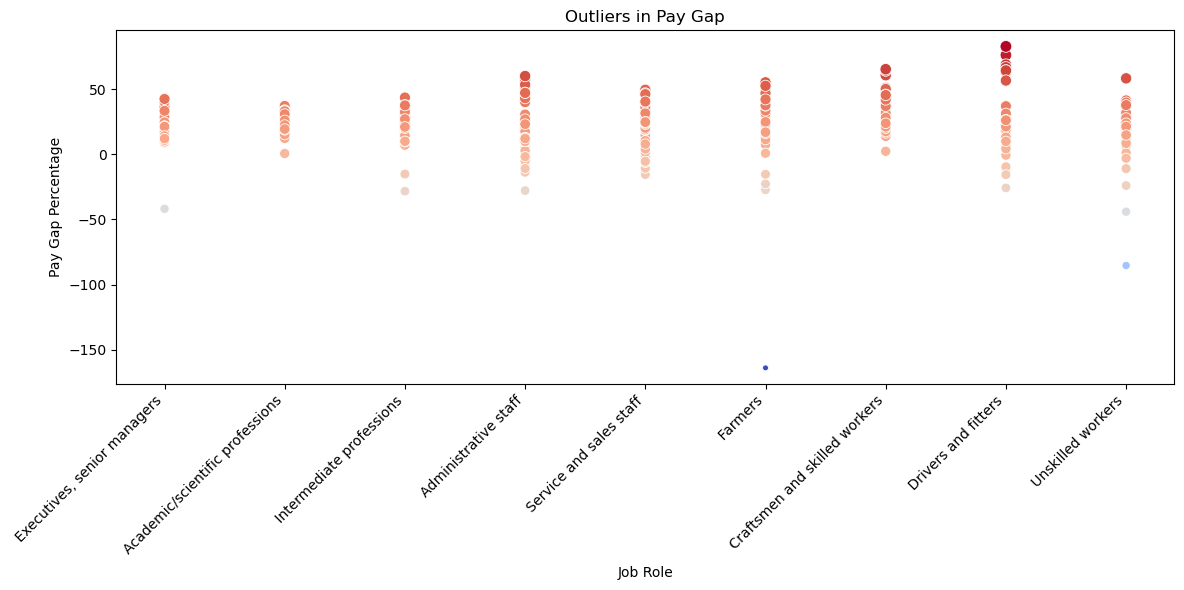

In [8]:
# Scatter Plot: Highlighting outliers in the pay gap
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Job Role", y="Pay Gap Percentage", hue="Pay Gap Percentage", size="Pay Gap Percentage", palette="coolwarm", legend=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Pay Gap Percentage")
plt.title("Outliers in Pay Gap")
plt.tight_layout()
plt.show()

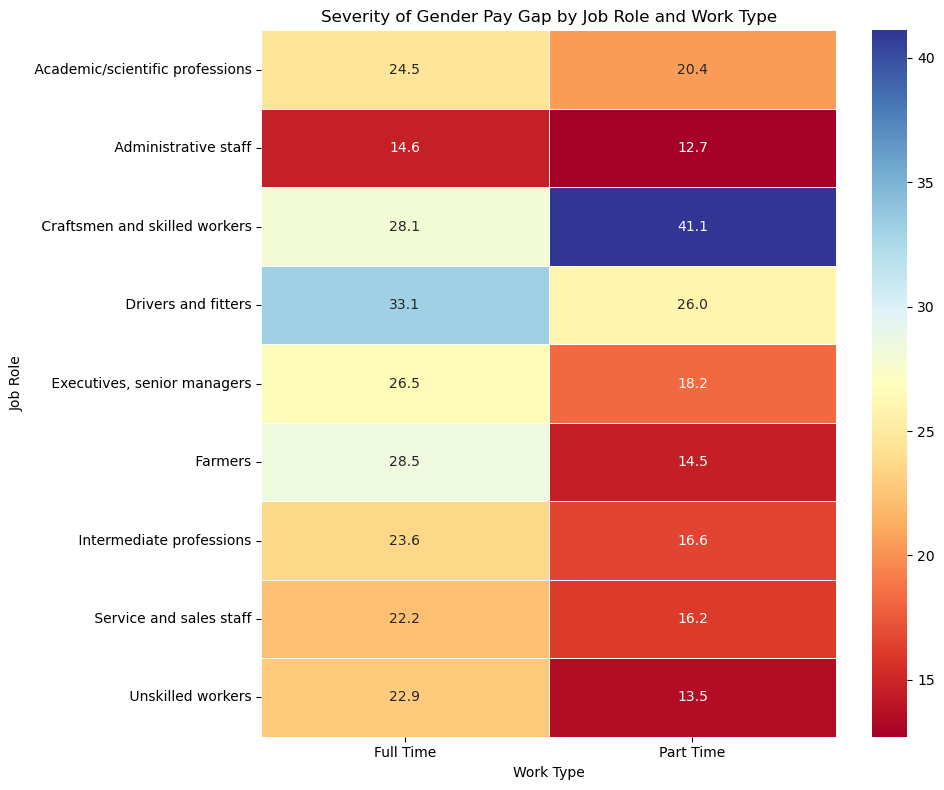

In [9]:
# Heatmap: Showing the severity of the gap by category and work type
heatmap_data = df.pivot_table(values="Pay Gap Percentage", index="Job Role", columns="Work Type")
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="RdYlBu", linewidths=0.5)
plt.title("Severity of Gender Pay Gap by Job Role and Work Type")
plt.xlabel("Work Type")
plt.ylabel("Job Role")
plt.tight_layout()
plt.show()

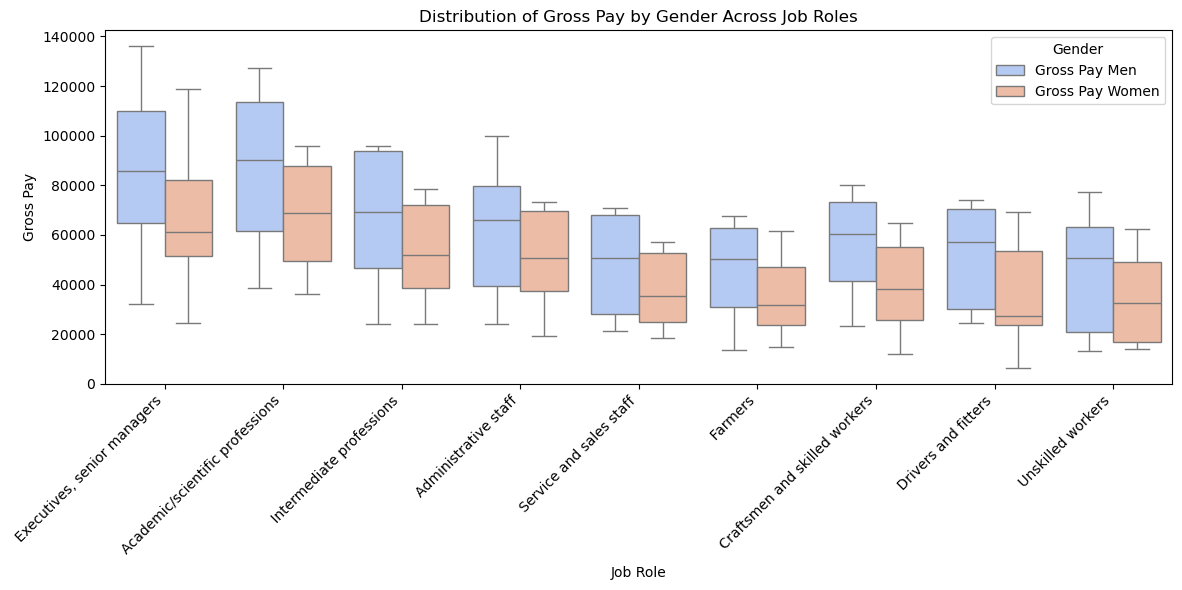

In [10]:
# 1. **Boxplot**: Distribution of Gross Pay by Gender Across Job Roles
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars=["Job Role"], value_vars=["Gross Pay Men", "Gross Pay Women"], 
                    var_name="Gender", value_name="Gross Pay")
sns.boxplot(data=df_melted, x="Job Role", y="Gross Pay", hue="Gender", palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Gross Pay by Gender Across Job Roles")
plt.ylabel("Gross Pay")
plt.tight_layout()
plt.show()

C:\Users\saksh\AppData\Local\Temp\ipykernel_9328\452849076.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




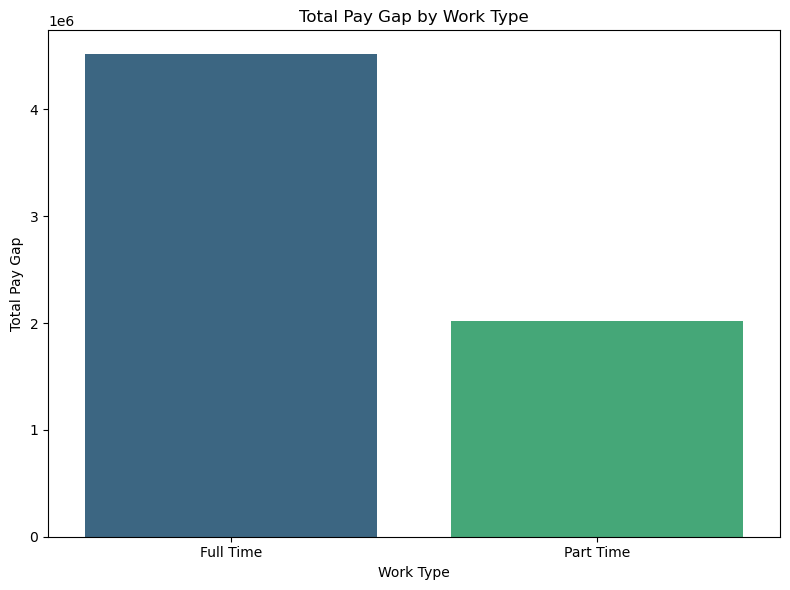

In [11]:
# 2. **Bar Chart**: Total Pay Gap by Work Type
plt.figure(figsize=(8, 6))
gap_by_work_type = df.groupby("Work Type")["Gender Pay Gap"].sum().reset_index()
sns.barplot(data=gap_by_work_type, x="Work Type", y="Gender Pay Gap", palette="viridis")
plt.title("Total Pay Gap by Work Type")
plt.ylabel("Total Pay Gap")
plt.tight_layout()
plt.show()

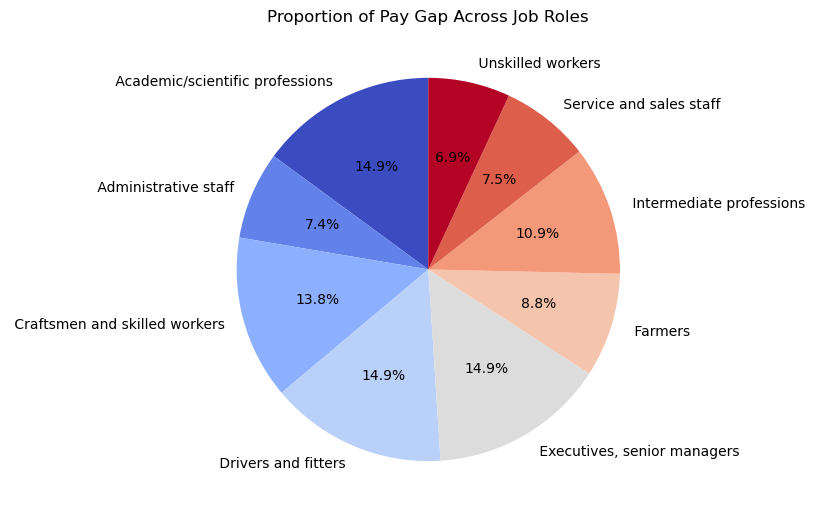

In [12]:
# 3. **Pie Chart**: Proportion of Pay Gap Across Job Roles
plt.figure(figsize=(8, 8))
pay_gap_by_job = df.groupby("Job Role")["Gender Pay Gap"].sum()
pay_gap_by_job.plot.pie(autopct="%1.1f%%", startangle=90, cmap="coolwarm", fontsize=10)
plt.title("Proportion of Pay Gap Across Job Roles")
plt.ylabel("")  # Hide y-axis label
plt.tight_layout()
plt.show()

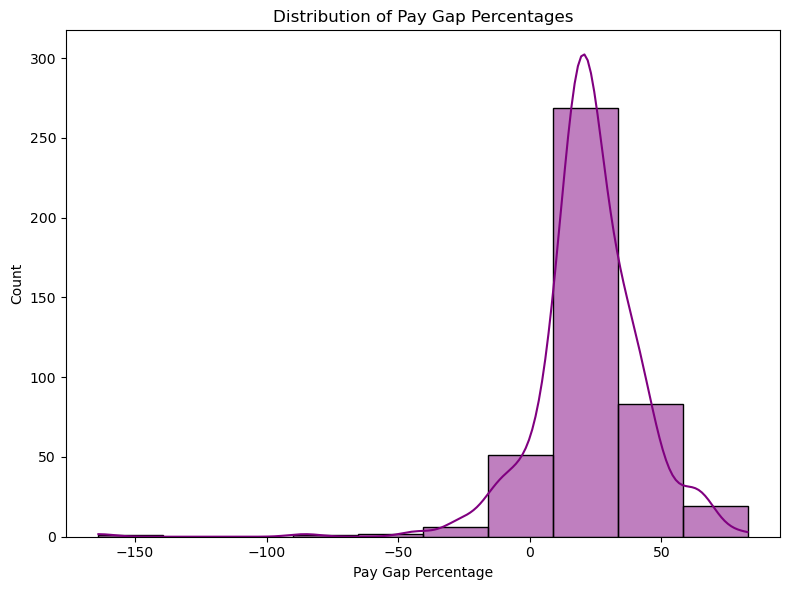

In [13]:
# 4. **Histogram**: Distribution of Pay Gap Percentages
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Pay Gap Percentage", kde=True, bins=10, color="purple")
plt.title("Distribution of Pay Gap Percentages")
plt.xlabel("Pay Gap Percentage")
plt.tight_layout()
plt.show()

C:\Users\saksh\AppData\Local\Temp\ipykernel_9328\759595429.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




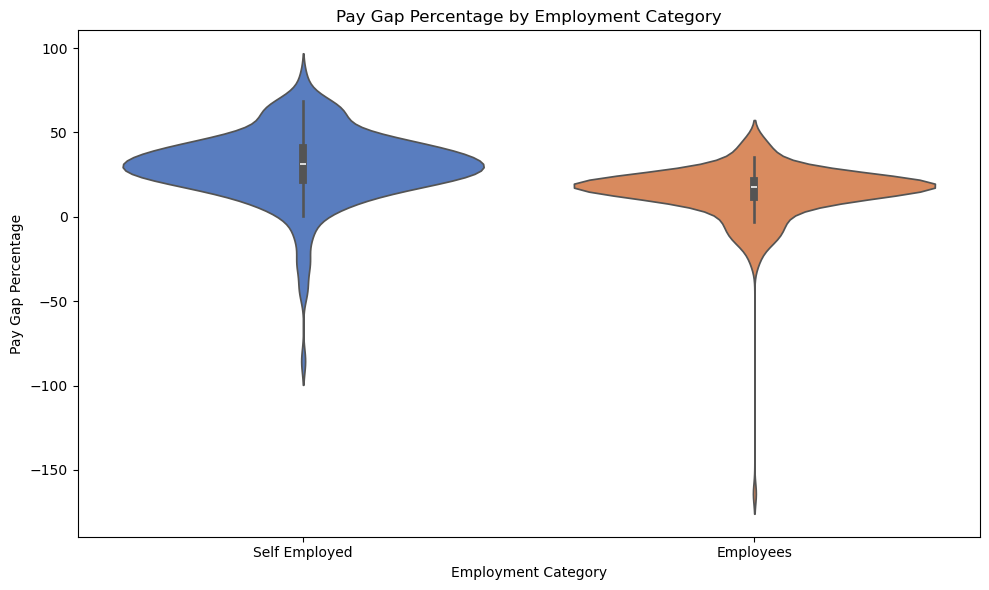

In [14]:
# 5. **Violin Plot**: Pay Gap Percentage by Employment Category
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Employment Category", y="Pay Gap Percentage", palette="muted")
plt.title("Pay Gap Percentage by Employment Category")
plt.ylabel("Pay Gap Percentage")
plt.tight_layout()
plt.show()

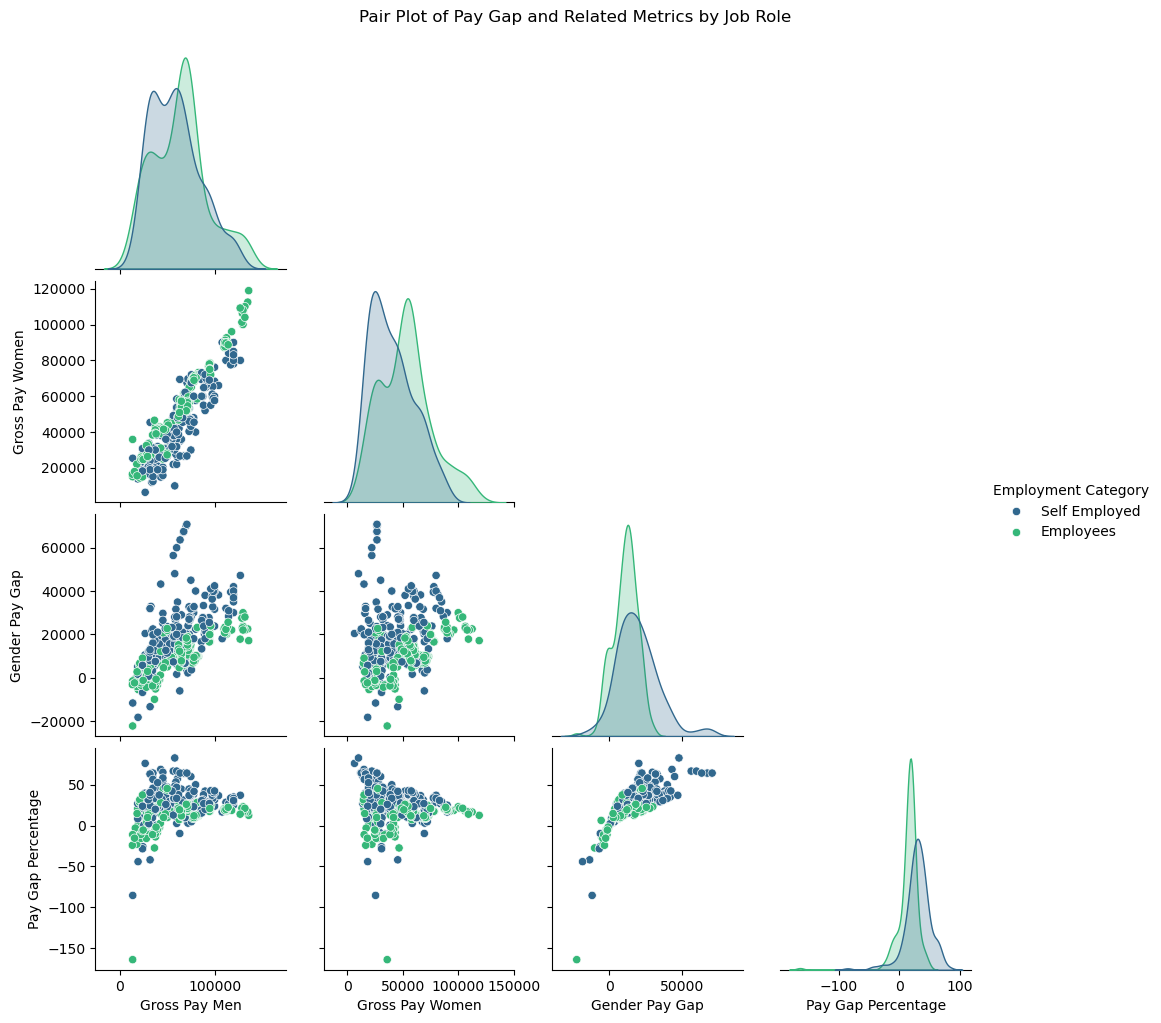

In [44]:
sns.pairplot_columns = ['Gross Pay Men', 'Gross Pay Women']
hue_column = 'Employment Category'  # Specify the categorical column for color coding

# Create a pair plot
sns.pairplot(df[pairplot_columns + [hue_column]], hue=hue_column, diag_kind='kde', corner=True, palette="viridis")

# Customize and show the plot
plt.suptitle('Pair Plot of Pay Gap and Related Metrics by Job Role', y=1.02)
plt.show()